<a href="https://colab.research.google.com/github/adrianpabon/Redes-Neuronales-con-Python-y-Keras/blob/main/Primera_Red_Neuronal_con_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical # to implement one hot encoding
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [3]:
train_data.shape

(60000, 28, 28)

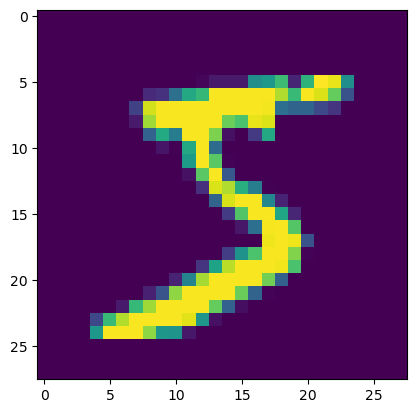

In [4]:
plt.imshow(train_data[0])

In [5]:
train_labels[0]

5

In [6]:
model = models.Sequential() 
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax')) # 10 because we have 10 classes


In [7]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
x_train = train_data.reshape((60000, 28 * 28)) # reshape the data into the shape the model expects.
x_train = x_train.astype('float32') / 255 # normalize the data so that the values are between 0 and 1.

In [10]:
y_train = to_categorical(train_labels) # categorically encode the labels
y_test = to_categorical(test_labels) # categorically encode the labels.

In [11]:
x_train[5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
train_labels[5]

2

Training the model

In [13]:
model.fit(x_train, y_train, epochs=5, batch_size=12) # train the model

#epochs are iterations over the entire x and y data provided. 
#batch size is the number of samples per gradient update for training.

Epoch 1/5
   1/5000 [..............................] - ETA: 14:00 - loss: 2.4612 - accuracy: 0.0000e+00

2023-12-12 20:40:49.443775: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


5000/5000 [==============================] - 8s 2ms/step - loss: 0.2002 - accuracy: 0.9426
Epoch 2/5
5000/5000 [==============================] - 8s 2ms/step - loss: 0.1116 - accuracy: 0.9732
Epoch 3/5
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0885 - accuracy: 0.9801
Epoch 4/5
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0752 - accuracy: 0.9843
Epoch 5/5
5000/5000 [==============================] - 9s 2ms/step - loss: 0.0665 - accuracy: 0.9863


## Función de pérdida 


In [14]:
def mse (y, y_hat, derivate=False):
    if derivate:
        return 2 * (y_hat - y)
    else:
        return np.mean((y_hat - y)**2)


In [16]:
real = np.array([0, 0, 1, 1])
prediction = np.array([0.9, 0.5, 0.2, 0.3])

In [17]:
mse(real, prediction)


0.5475